<a href="https://colab.research.google.com/github/yutao-data/Financial-Calculator/blob/main/China_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tushare

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.8/140.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 25.4 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.8.0
    Uninstalling websocket-client-1.8.0:
      Successfully uninstalled websocket-client-1.8.0


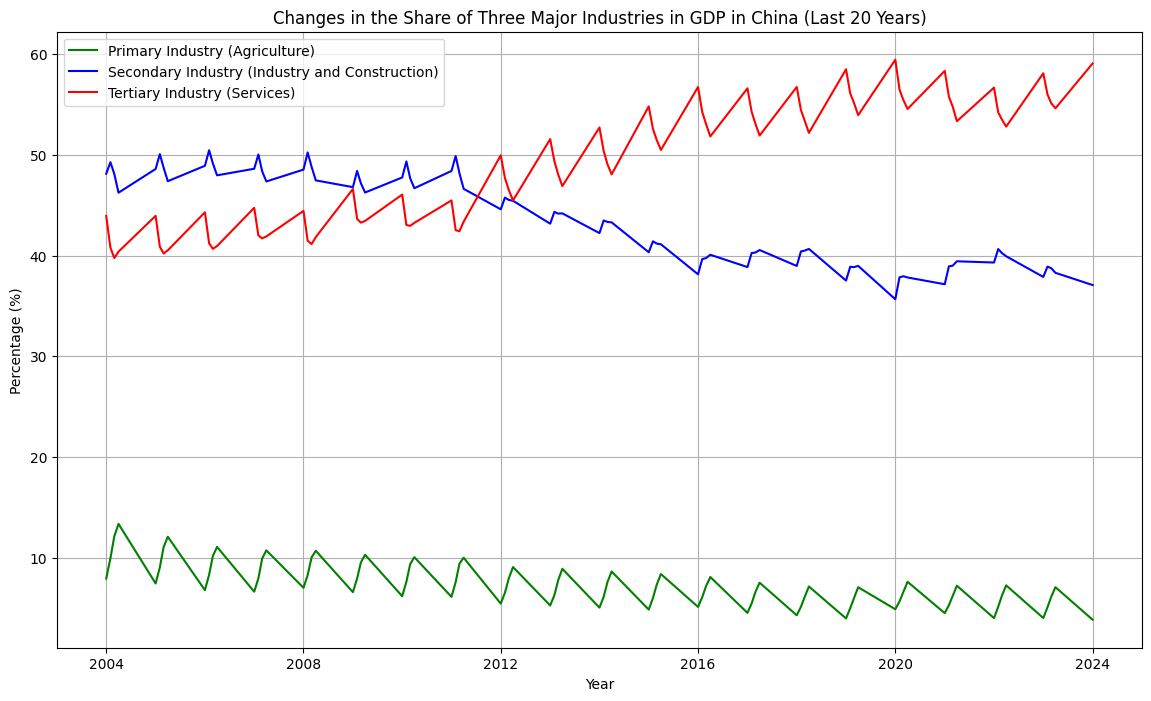

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import tushare as ts

# Initialize the Tushare API
pro = ts.pro_api('78282dabb315ee578fb73a9b328f493026e97d5af709acb331b7b348')

gdp_data = pro.cn_gdp(start_q='2004Q1', end_q='2024Q1', fields='quarter,pi,si,ti')
gdp_data['quarter'] = pd.to_datetime(gdp_data['quarter'].str.replace('Q', ''), format='%Y%m')
gdp_data.set_index('quarter', inplace=True)

gdp_data['total'] = gdp_data['pi'] + gdp_data['si'] + gdp_data['ti']
gdp_data['pi_ratio'] = gdp_data['pi'] / gdp_data['total'] * 100
gdp_data['si_ratio'] = gdp_data['si'] / gdp_data['total'] * 100
gdp_data['ti_ratio'] = gdp_data['ti'] / gdp_data['total'] * 100

plt.figure(figsize=(14, 8))

plt.plot(gdp_data.index, gdp_data['pi_ratio'], label='Primary Industry (Agriculture)', color='green')
plt.plot(gdp_data.index, gdp_data['si_ratio'], label='Secondary Industry (Industry and Construction)', color='blue')
plt.plot(gdp_data.index, gdp_data['ti_ratio'], label='Tertiary Industry (Services)', color='red')

plt.title('Changes in the Share of Three Major Industries in GDP in China (Last 20 Years)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.show()

Original GDP Data:
   quarter  gdp_yoy
0  2023Q4      5.2
1  2023Q3      5.2
2  2023Q2      5.5
3  2023Q1      4.5
4  2022Q4      3.0
Converted GDP Data:
             gdp_yoy
quarter            
2023-04-01      5.2
2023-03-01      5.2
2023-02-01      5.5
2023-01-01      4.5
2022-04-01      3.0


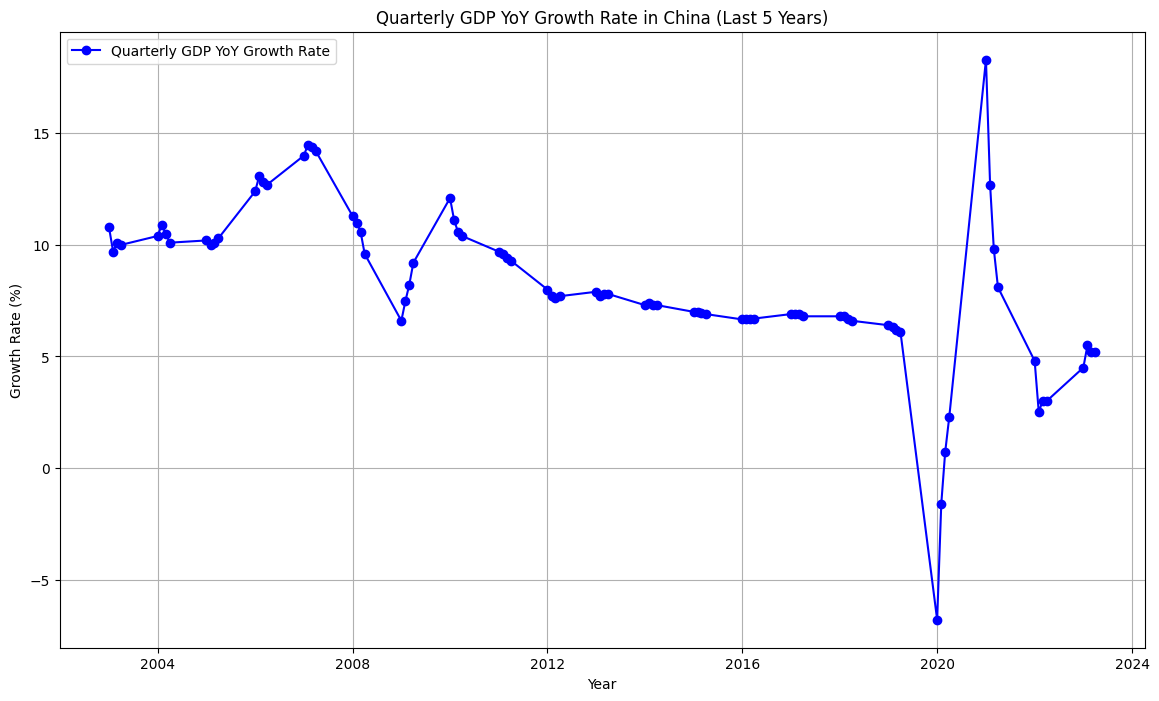

In [11]:
gdp_data = pro.cn_gdp(start_q='2003Q1', end_q='2023Q4', fields='quarter,gdp_yoy')

gdp_data['quarter'] = pd.to_datetime(gdp_data['quarter'].str.replace('Q', ''), format='%Y%m')
gdp_data.set_index('quarter', inplace=True)

print("Converted GDP Data:\n", gdp_data.head())

plt.figure(figsize=(14, 8))

plt.plot(gdp_data.index, gdp_data['gdp_yoy'], marker='o', linestyle='-', color='blue', label='Quarterly GDP YoY Growth Rate')

plt.title('Quarterly GDP YoY Growth Rate in China (Last 5 Years)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()